In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


# Read the data

In [2]:
bank=pd.read_csv('bank-full.csv')
bank


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

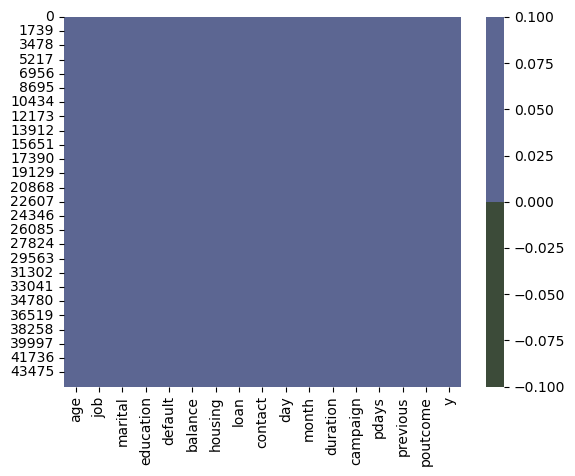

In [6]:
color=['#3C4B39','#5C6692']
pal=sns.color_palette(color)
sns.heatmap(bank.isnull(),cmap=pal)

In [7]:
bank.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [8]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# covert string into integer 

In [10]:
bank['job']=pd.Categorical(bank['job'])
bank['job']=bank['job'].cat.codes

In [11]:
bank['marital']=pd.Categorical(bank['marital'])
bank['marital']=bank['marital'].cat.codes

In [12]:
bank['education']=pd.Categorical(bank['education'])
bank['education']=bank['education'].cat.codes

In [13]:
bank['default']=pd.Categorical(bank['default'])
bank['default']=bank['default'].cat.codes

In [14]:
bank['housing']=pd.Categorical(bank['housing'])
bank['housing']=bank['housing'].cat.codes

In [15]:
bank['loan']=pd.Categorical(bank['loan'])
bank['loan']=bank['loan'].cat.codes

In [16]:
bank['contact']=pd.Categorical(bank['contact'])
bank['contact']=bank['contact'].cat.codes

In [17]:
bank['month']=pd.Categorical(bank['month'])
bank['month']=bank['month'].cat.codes

In [18]:
bank['poutcome']=pd.Categorical(bank['poutcome'])
bank['poutcome']=bank['poutcome'].cat.codes

In [19]:
bank['y']=pd.Categorical(bank['y'])
bank['y']=bank['y'].cat.codes

In [20]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [7]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

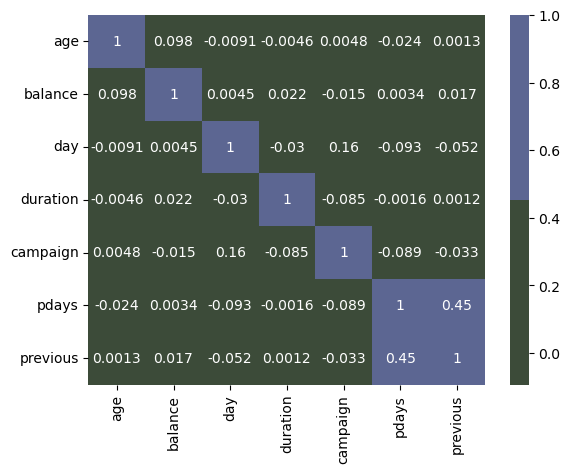

In [9]:
color=['#3C4B39','#5C6692']
pal=sns.color_palette(color)
sns.heatmap(bank.corr(),cmap=pal, annot=True)

# visualise the data

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

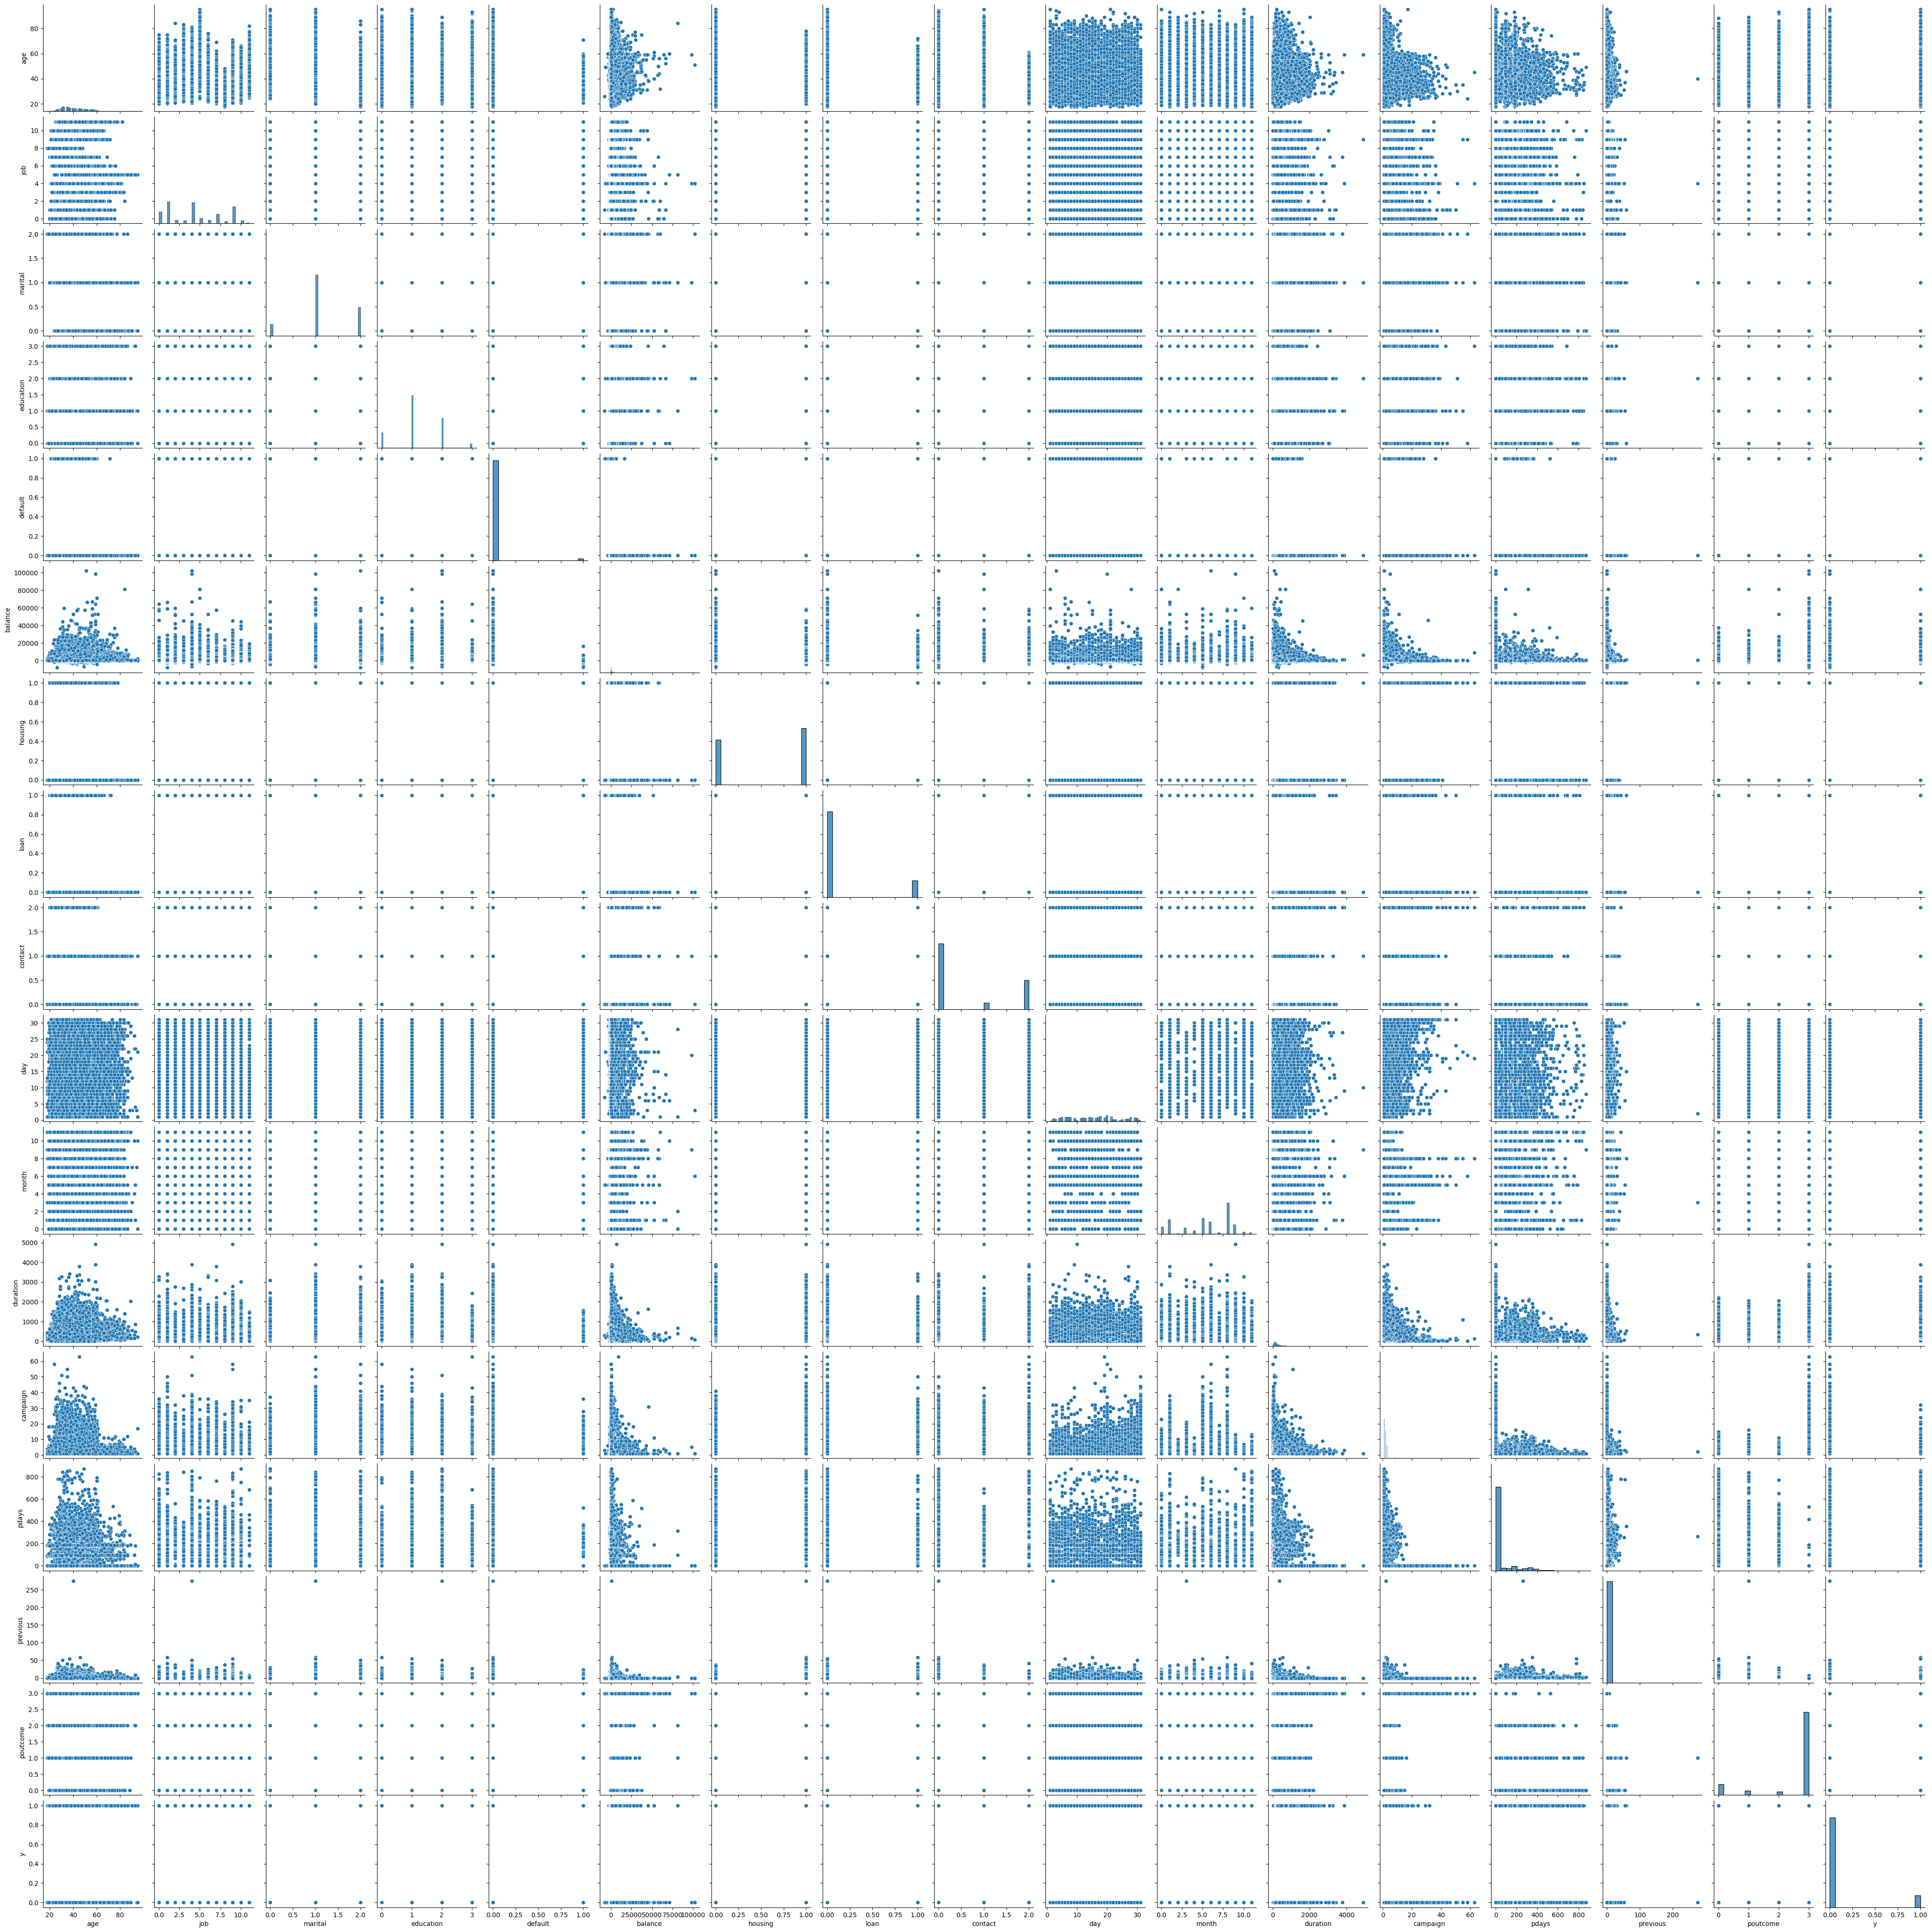

In [24]:
sns.pairplot(data=bank)

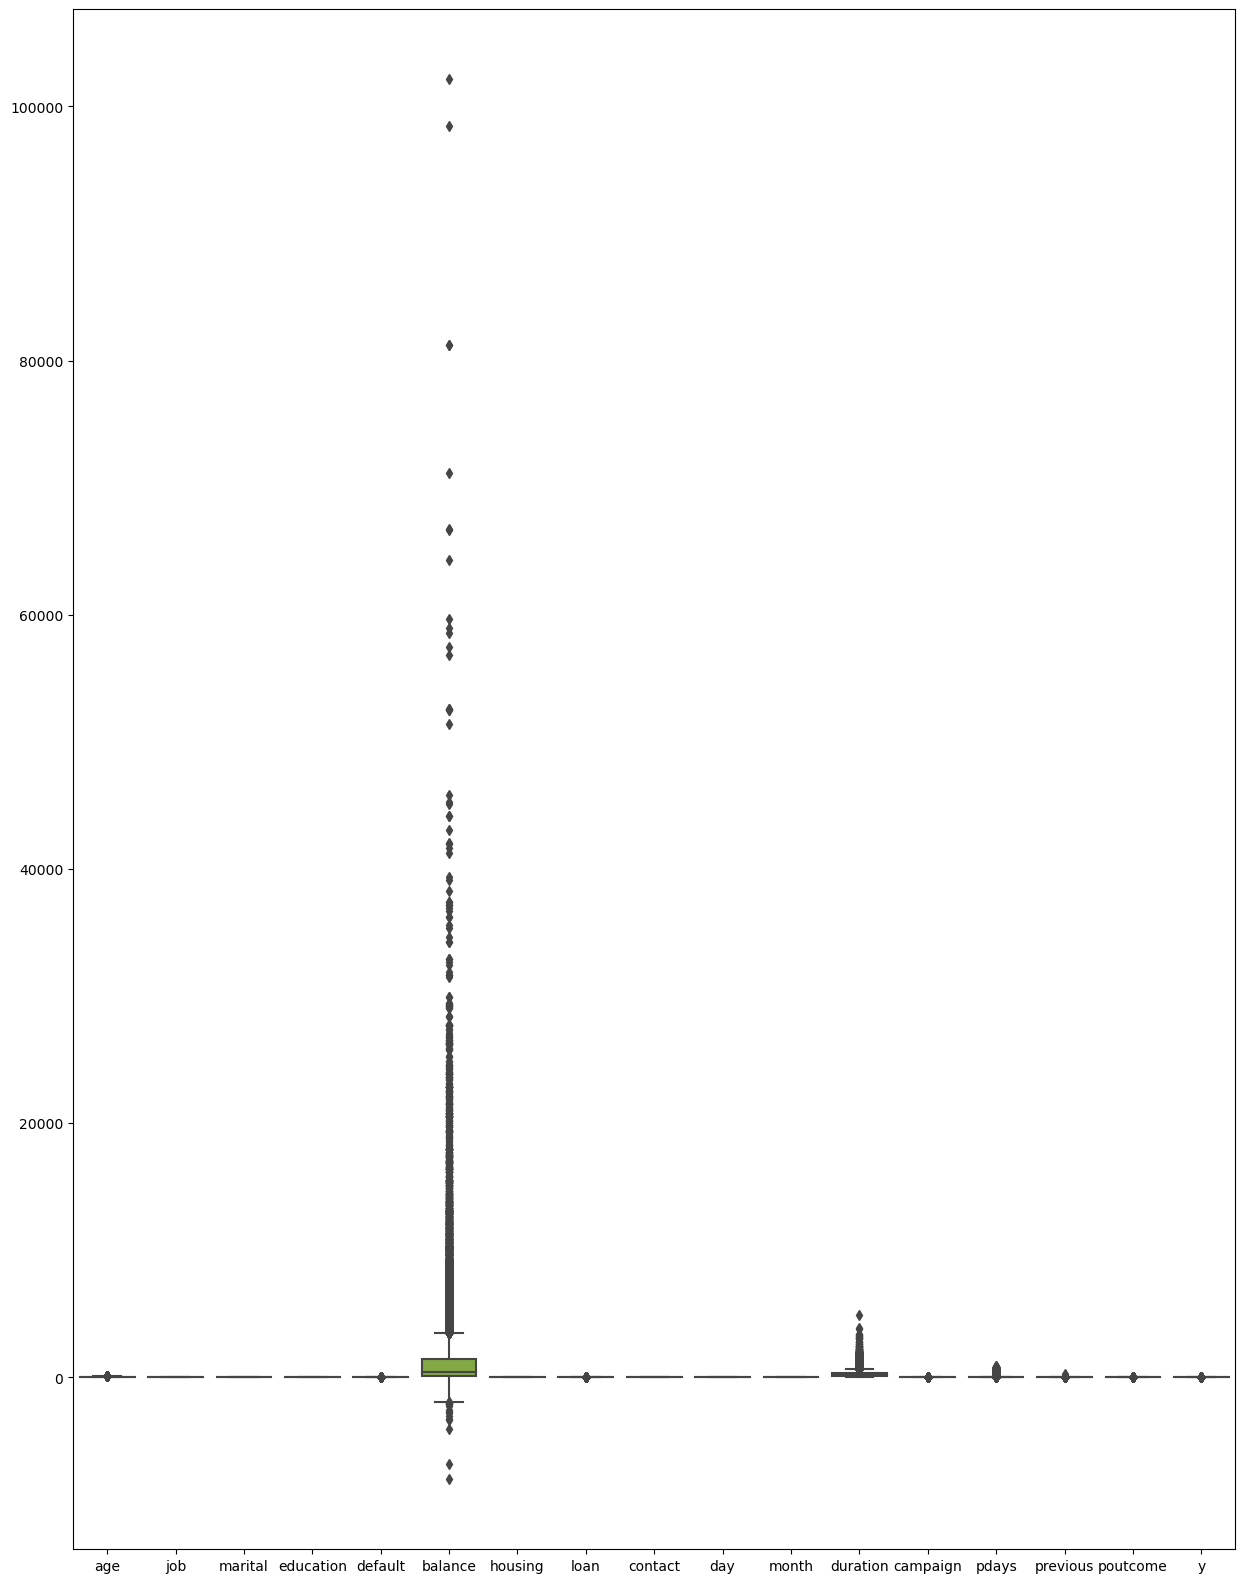

In [25]:
plt.figure(figsize=(15,20))
sns.boxplot(data=bank)
plt.show()

In [26]:
bank.shape

(45211, 17)

# preparing the model

In [28]:
import statsmodels.formula.api as smf
model=smf.ols('y~age+job+marital+education+default+balance+housing+loan+contact+day+month+duration+campaign+pdays+previous+poutcome',data=bank).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     756.1
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:56:40   Log-Likelihood:                -7472.4
No. Observations:               45211   AIC:                         1.498e+04
Df Residuals:                   45194   BIC:                         1.513e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1189      0.013     -9.474      0.000      -0.143      -0.094
age            0.0008      0.000      5.441      0.000       0.000       0.001
job            0.0010      0.000      2.404      0.016       0.000       0.002
marital        0.0189      0.002      7.745      0.000       0.014       0.024
education      0.0166      0.002      8.941      0.000       0.013       0.020
default       -0.0217      0.010     -2.140      0.032      -0.042      -0.002
balance     2.269e-06   4.48e-07      5.063      0.000    1.39e-06    3.15e-06
housing       -0.0849      0.003    -28.784      0.000      -0.091      -0.079
loan          -0.0443      0.004    -11.982      0.000      -0.052      -0.037
contact       -0.0387      0.002    -22.540      0.000      -0.042      -0.035
day           -0.0004      0.000     -2.382      0.017      -0.001   -6.94e-05
month          0.0050      0.000     10.044      0.000       0.004       0.006
duration       0.0005   5.24e-06     92.299      0.000       0.000       0.000
campaign      -0.0030      0.000     -6.658      0.000      -0.004      -0.002
pdays          0.0004   2.64e-05     16.668      0.000       0.000       0.000
previous       0.0080      0.001     11.964      0.000       0.007       0.009
poutcome       0.0286      0.003     10.415      0.000       0.023       0.034
==============================================================================
Omnibus:                    14147.785   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42031.370
Skew:                           1.646   Prob(JB):                         0.00
Kurtosis:                       6.388   Cond. No.                     3.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Detecting Influencers/Outliers

# cook's Distance

In [32]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [33]:
(np.argmax(c),np.max(c))

(29182, 4.961677146518194)

# Stem plot

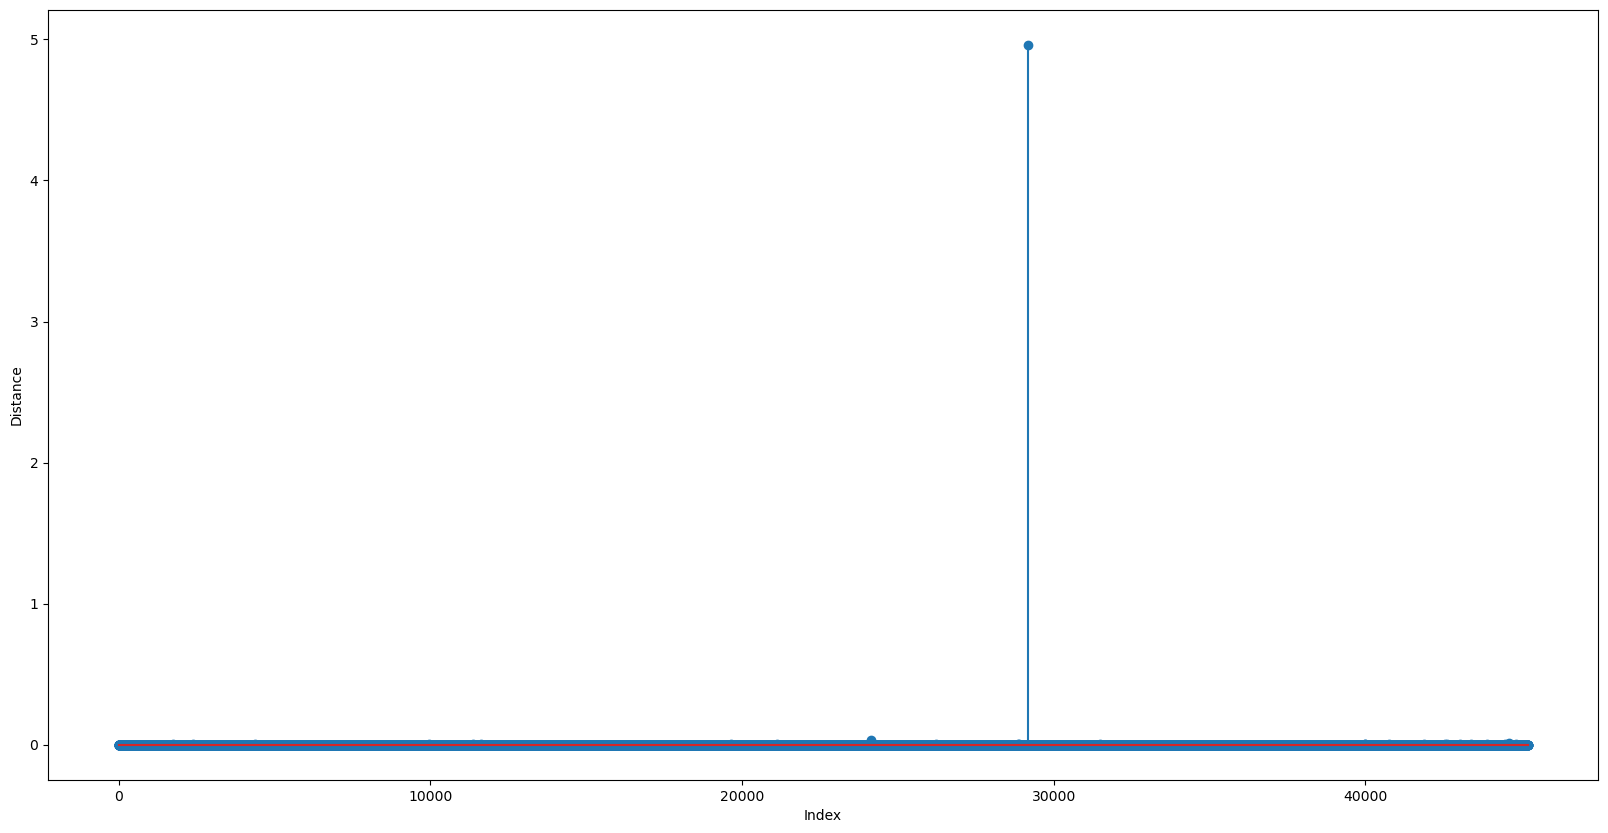

In [35]:
fig=plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(bank)),np.round(c,3))
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [36]:
X=bank.iloc[:,0:16]

In [37]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [38]:
y=bank.iloc[:,16]

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int8

# split the data into tarin and test

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

# build the model

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf=LogisticRegression()

# train the model

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
clf.fit(X_train,y_train)

LogisticRegression()

# predicting classes 

# Make prediction for training data

In [51]:
train_pred=clf.predict(X_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [52]:
test_pred=clf.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

# get training Metrics

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
confusion_matrix(y_train,train_pred)

array([[31388,   582],
       [ 3456,   742]], dtype=int64)

In [56]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.56      0.18      0.27      4198

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



# get test data

In [58]:
confusion_matrix(y_test,test_pred)

array([[7804,  148],
       [ 900,  191]], dtype=int64)

In [59]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043



In [60]:
!pip install --upgrade scikit-learn

In [61]:
#!pip uninstall scikit-learn
!pip install scikit-learn

In [62]:
from sklearn.datasets import make_classification
from sklearn.utils import resample

In [66]:
 X,y=make_classification(n_samples=45211, n_features=17,weights=[0.8,0.2],random_state=42)

In [67]:
bank_new=pd.DataFrame(data=bank,columns=bank.columns)
bank_new['y']=y
bank_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,1
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,1


In [68]:
majority_class=bank_new[bank_new['y']==0]
minority_class=bank_new[bank_new['y']==1]

In [76]:
downsampled_majority=resample(majority_class,replace=False,n_samples=len(minority_class),random_state=42)

In [77]:
df_downsampled=pd.concat([downsampled_majority,minority_class])
df_downsampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35455,53,2,1,1,0,162,1,0,0,7,8,270,2,-1,0,3,0
28636,32,9,1,1,0,0,0,0,0,29,4,750,3,-1,0,3,0
4647,39,4,1,2,0,351,1,0,2,20,8,999,3,-1,0,3,0
32143,61,4,1,2,0,0,1,0,0,15,0,114,1,-1,0,3,0
19406,33,8,0,1,0,422,0,0,0,6,1,406,3,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,1


In [78]:
X=df_downsampled.iloc[:,:16]
y=df_downsampled.iloc[:,16]

# split data into train and test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14747, 16), (3687, 16), (14747,), (3687,))

# build the model

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
clf=LogisticRegression()

# trian the model

In [86]:
clf.fit(X_train,y_train)

LogisticRegression()

# predicting classes

# make prediction for training data 

In [89]:
train_pred=clf.predict(X_train)
train_pred

array([1, 0, 1, ..., 1, 1, 1])

In [90]:
test_pred=clf.predict(X_test)
test_pred

array([0, 0, 1, ..., 0, 0, 1])

# get training metrics

In [101]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [93]:
confusion_matrix(y_train,train_pred)

array([[3450, 3919],
       [3290, 4088]], dtype=int64)

In [94]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49      7369
           1       0.51      0.55      0.53      7378

    accuracy                           0.51     14747
   macro avg       0.51      0.51      0.51     14747
weighted avg       0.51      0.51      0.51     14747



In [98]:
#the output probabilities
train_proba=clf.predict_proba(X_train)
train_proba

array([[0.48673513, 0.51326487],
       [0.50822684, 0.49177316],
       [0.49218546, 0.50781454],
       ...,
       [0.4913251 , 0.5086749 ],
       [0.49748806, 0.50251194],
       [0.49891357, 0.50108643]])

In [99]:
train_proba[:,1]

array([0.51326487, 0.49177316, 0.50781454, ..., 0.5086749 , 0.50251194,
       0.50108643])

In [102]:
#false positive rate,true possitive rate,threshold 
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])


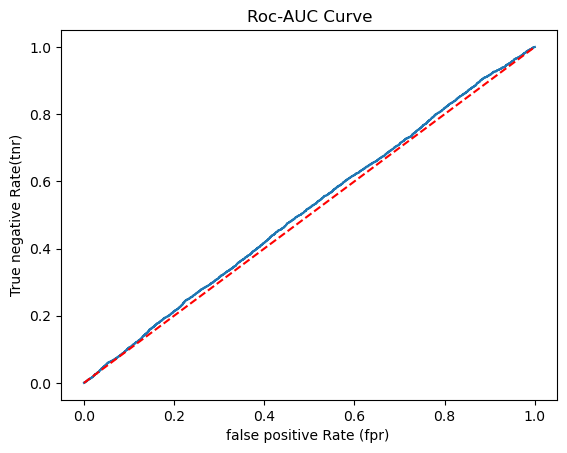

In [103]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('Roc-AUC Curve')
plt.xlabel('false positive Rate (fpr) ')
plt.ylabel('True negative Rate(tnr)')
plt.show()

In [104]:
roc_auc_score(y_train,train_pred)

0.511128598366973

# get testing metrics

In [96]:
confusion_matrix(y_test,test_pred)

array([[863, 985],
       [849, 990]], dtype=int64)

In [97]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48      1848
           1       0.50      0.54      0.52      1839

    accuracy                           0.50      3687
   macro avg       0.50      0.50      0.50      3687
weighted avg       0.50      0.50      0.50      3687



In [105]:
#the output probabilities
test_proba=clf.predict_proba(X_test)
test_proba

array([[0.50402955, 0.49597045],
       [0.5218823 , 0.4781177 ],
       [0.47652487, 0.52347513],
       ...,
       [0.50140313, 0.49859687],
       [0.50280469, 0.49719531],
       [0.49483435, 0.50516565]])

In [106]:
test_proba[:,1]


array([0.49597045, 0.4781177 , 0.52347513, ..., 0.49859687, 0.49719531,
       0.50516565])

In [109]:
#false positive rate,true possitive rate,threshold 
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])


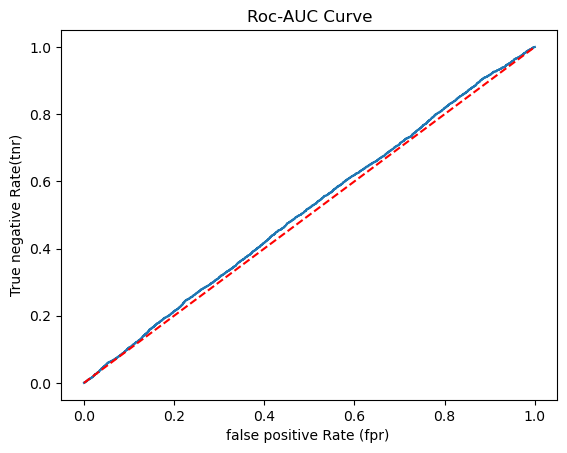

In [108]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('Roc-AUC Curve')
plt.xlabel('false positive Rate (fpr) ')
plt.ylabel('True negative Rate(tnr)')
plt.show()

In [111]:
roc_auc_score(y_test,test_pred)

0.5026636970968129